A figure which addresses the question: do the individual units predict anything about behavior. I had a suspicion they wouldn't, which would have been an interesting result, but it turns out they do. So... this isn't very interesting or notable. Doesn't seem worth including in the paper or looking into any further.

In [ ]:
include(joinpath("..","src","interactive_setup.jl"))

┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v1.1/DataFramesMeta/2xRTO.ji for DataFramesMeta [1313f7d8-7da2-5740-9ea0-a2ca25f37964]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v1.1/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v1.1/DependentBootstrap/iCB3r.ji for DependentBootstrap [191d1da1-0f37-5779-b8ea-a655caa0c150]
└ @ Base loading.jl:1184


In [139]:
datadir = joinpath("..","data","count_lengths","run_2018-11-26")

"../data/count_lengths/run_2018-11-26"

In [140]:
params = load_params(joinpath(datadir,"params.jld2"))
params[!,:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")

results = []
for_results_in(joinpath(datadir,"data"),reinterpret="reinterpret") do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
first(df,6)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,0.2,2,2018-11-26T17:38:30.128,1
2,11.4,1,2018-11-26T17:38:30.128,1
3,0.4,2,2018-11-26T17:38:30.128,1
4,5.1,1,2018-11-26T17:38:30.128,1
5,0.4,2,2018-11-26T17:38:30.128,1
6,18.6,1,2018-11-26T17:38:30.128,1


In [270]:
model = copy(params[select_params(params,f_c_a=15,f_c_m=130,Δf=6),:])
model.f_c_σ .= 0.5
model.t_c_a .= 5
model.t_c_m .= 5
model.s_c_a .= 5
model.s_c_m .= 5

settings["stimulus"]["repeats"] = 36

36

In [271]:
r = bistable_model(model,settings,intermediate_results=true);

In [272]:
getindex.(CartesianIndices(size(obj)),2)

172×6 Array{Int64,2}:
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 ⋮              ⋮
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6
 1  2  3  4  5  6

In [273]:
obj = r.sources.outweights;
axisvalues(obj)[2][getindex.(CartesianIndices(size(obj)),2)]

172×6 Array{Tuple{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},Float64,Float64},2}:
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)  …  (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)  …  (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)  …  (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 (3.0 s, 0.25, 150.0)  (3.0 s, 0.5, 150.0)     (3.0 s, 0.8, 200.0)
 ⋮                                  

In [274]:
Base.axes(obj)

(Base.OneTo(172), Base.OneTo(6))

In [275]:
rename!(responses,:delta => :Δ)

,length,response,run,Δ,model
,Float64,Int64,Int64,Int64,Symbol
1,16.5,1,1,3,none
2,16.5,1,2,3,none
3,16.5,1,3,3,none
4,16.5,1,4,3,none
5,16.5,1,5,3,none
6,0.6,1,1,6,none
7,15.9,2,1,6,none
8,0.6,1,2,6,none
9,15.9,2,2,6,none


In [276]:
unitvalue(x,d=2) = vec(axisvalues(x)[d][getindex.(CartesianIndices(size(x)),d)])

unitvalue (generic function with 2 methods)

In [277]:
using Statistics

In [278]:
function resp_cor(x,len,val,d=2)
    y = zeros(length(times(x)))
    update_buildup!(y,ustrip.(times(x)),DataFrame(length=len,response=val))
    vec(cor(x,y,dims=1))
end

resp_cor (generic function with 2 methods)

In [279]:
function resp_cor_rand(x,len,val,d=2)
    y = zeros(length(times(x)))
    update_buildup!(y,ustrip.(times(x)),DataFrame(length=len,response=val))
    vec(cor(x,shuffle!(y),dims=1))
end

resp_cor_rand (generic function with 2 methods)

In [280]:
uround(x::Quantity) = round(Int,ustrip(x))*unit(x)
uround(x) = x

uround (generic function with 2 methods)

In [281]:
axvalues(x) = string.(uround.(axisvalues(x)[2]))

axvalues (generic function with 1 method)

In [282]:
model = p_all
results = []
N = 20
@showprogress for (run,Δ) in Iterators.product(1:N,[3,6,12])
    model.Δf .= Δ
    with_logger(NullLogger()) do
        r = bistable_model(model,settings,intermediate_results=true)
        obj = r.sources.outweights
        cen = r.cortical.outweights
        per = r.spect.result
        len,val = r.percepts.counts
        
        push!(results,
            DataFrame(
                level = "object", 
                sim = "actual",
                cor = resp_cor(obj,len,val),
                unit = axvalues(obj)))
        push!(results,
            DataFrame(
                level = "object", 
                sim = "rand",
                cor = resp_cor_rand(obj,len,val),
                unit = axvalues(obj)))
        
        push!(results,
            DataFrame(
                level = "central" ,
                sim = "actual",
                cor = resp_cor(cen,len,val),
                unit = axvalues(cen)))
        push!(results,
            DataFrame(
                level = "central", 
                sim = "rand",
                cor = resp_cor_rand(cen,len,val),
                unit = axvalues(cen)))
        
        push!(results,
            DataFrame(
                level = "peripheral",
                sim = "actual",
                cor = resp_cor(per,len,val),
                unit = axvalues(per)))
        push!(results,
            DataFrame(
                level = "peripheral", 
                sim = "rand",
                cor = resp_cor_rand(per,len,val),
                unit = axvalues(per)))
    end
end

cors = vcat(results...)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:49


,level,sim,cor,unit
,String,String,Float64,String
1,object,actual,0.126467,"(3.0 s, 0.25, 150.0)"
2,object,actual,-0.175356,"(3.0 s, 0.5, 150.0)"
3,object,actual,-0.132232,"(3.0 s, 0.8, 150.0)"
4,object,actual,0.106849,"(3.0 s, 0.25, 200.0)"
5,object,actual,-0.00409351,"(3.0 s, 0.5, 200.0)"
6,object,actual,0.00453598,"(3.0 s, 0.8, 200.0)"
7,object,rand,0.197381,"(3.0 s, 0.25, 150.0)"
8,object,rand,0.0345464,"(3.0 s, 0.5, 150.0)"
9,object,rand,-0.0389213,"(3.0 s, 0.8, 150.0)"


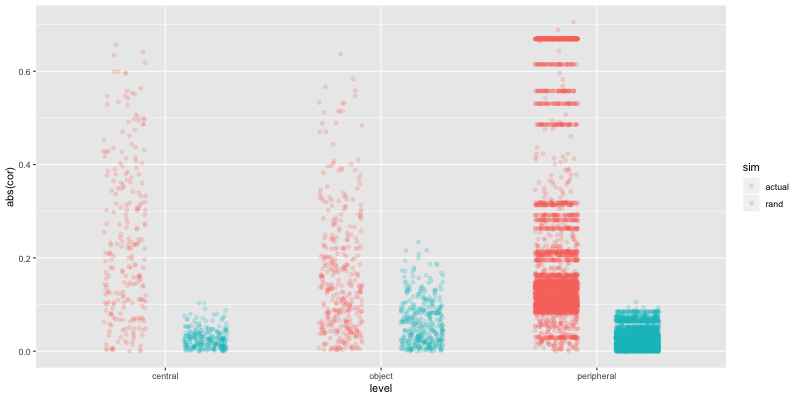

RObject{VecSxp}


┌ Warning: RCall.jl: Warning: Removed 2 rows containing missing values (geom_point).
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113


In [132]:
R"""
ggplot($cors,aes(x=level,y=abs(cor),color=sim,group=sim)) + geom_point(alpha=0.2,position=position_jitterdodge(jitter.width=0.2))
"""

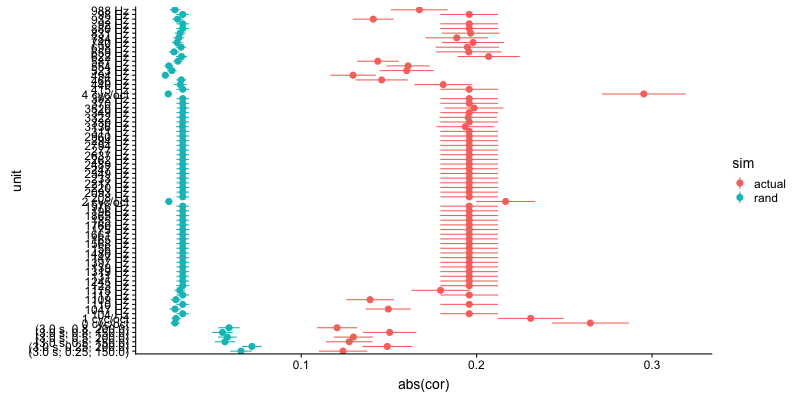

RObject{VecSxp}


┌ Warning: RCall.jl: No summary function supplied, defaulting to `mean_se()
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113


In [283]:
R"""
ggplot($cors,aes(x=unit,y=abs(cor),color=sim)) + stat_summary() + coord_flip()
"""